<a href="https://colab.research.google.com/github/WiratchawaKannika/DPDM65/blob/main/CleanData_Finalexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# **Import Data**

In [2]:
Data = pd.read_csv('/content/drive/MyDrive/DPDM65/Final/train.csv')

col_num = ['number_of_story', 'number_of_bedroom' ,'number_of_bathroom', 'number_of_parking', 'central_cost' ,'parking_percentage', 'number_of_rai', 
              'number_of_ngan', 'number_of_va', 'usable_area', 'sell_price']
Data[col_num] = Data[col_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(Data.shape)  ##บอกขนาดของ DataFrame
Data.head()

(2725, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

- *Learning the dtypes of columns and how many non-null values are there in those columns*


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2725 non-null   int64  
 1   id                  2725 non-null   object 
 2   project_name        621 non-null    object 
 3   company             419 non-null    object 
 4   province            2723 non-null   object 
 5   district            2721 non-null   object 
 6   sub_district        2541 non-null   object 
 7   property_type       2725 non-null   object 
 8   home improvement    1606 non-null   object 
 9   renovate            1587 non-null   object 
 10  public utility      804 non-null    object 
 11  land type           310 non-null    object 
 12  land wide(m)        315 non-null    float64
 13  land long(m)        253 non-null    object 
 14  topsoil             510 non-null    object 
 15  corner              485 non-null    object 
 16  zip_co

- *Getting the statistical summary of dataset*

In [4]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2725.0,1.362000e+03,7.867841e+02,0.0,681.0,1362.0,2043.0,2.724000e+03
land wide(m),315.0,5.545616e+01,7.558541e+01,4.0,12.0,27.5,65.0,4.200000e+02
zip_code,1741.0,4.635122e+06,1.355348e+08,40000.0,40000.0,40000.0,40130.0,4.000040e+09
number_of_rai,2725.0,3.561101e+00,1.590596e+01,0.0,0.0,0.0,0.0,4.580000e+02
number_of_ngan,2724.0,6.982379e-01,4.361887e+00,0.0,0.0,0.0,1.0,1.450000e+02
number_of_va,2725.0,4.405461e+01,5.895673e+01,0.0,5.0,35.0,66.0,1.656000e+03
construct_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sell_price,2715.0,2.837311e+07,7.713639e+08,0.0,1450000.0,2590000.0,4900000.0,4.000000e+10
number_of_story,1162.0,1.819277e+00,2.143345e+00,0.0,1.0,2.0,2.0,3.700000e+01


- จะเห็นว่า Columns ที่ควรเป็นตัวเลข ประเภทยังคงเป็น Object อยู่ ไม่สามารถแสดงค่าทางสถิติได้ ต้องทำความสะอาดข้อมูลก่อน

### ทำความสะอาดตัวแปร `"sell_price"`

#### Check จำนวน Rows ที่มี Missing ใน Column `"sell_price"`

In [5]:
 Data_null = Data[Data['sell_price'].isna()]
 sell_price_null  = Data_null.shape[0]/Data.shape[0]*100
 print(f'จำนวนที่ COlumn sell_price มี Missing คือ : {sell_price_null}%')

จำนวนที่ COlumn sell_price มี Missing คือ : 0.3669724770642202%


- จำนวนที่ COlumn sell_price มี Missing ไม่ถึง 10% ของจำนวนข้อมูลทั้งหมด จึงจะทำการลบ Rows ที่ไม่มีค่าใน Column `"sell_price"` ที่จะใช้สำหรับทำนายราคาที่อยู่อาศัย (y)

In [6]:
Data_df = Data.dropna(subset=['sell_price']).reset_index(drop=True)
print(Data_df.shape)
Data_df.head()

(2715, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


- ตัวแปร `sell_price` ไม่มีค่าสูญหาย และไม่มีค่าที่ไม่ใช่ตัวเลขแล้ว

In [7]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2715 non-null   int64  
 1   id                  2715 non-null   object 
 2   project_name        620 non-null    object 
 3   company             418 non-null    object 
 4   province            2715 non-null   object 
 5   district            2713 non-null   object 
 6   sub_district        2534 non-null   object 
 7   property_type       2715 non-null   object 
 8   home improvement    1604 non-null   object 
 9   renovate            1585 non-null   object 
 10  public utility      800 non-null    object 
 11  land type           309 non-null    object 
 12  land wide(m)        314 non-null    float64
 13  land long(m)        252 non-null    object 
 14  topsoil             507 non-null    object 
 15  corner              485 non-null    object 
 16  zip_co

#### แทนค่า ค่าสูญหาย และ "ไม่ระบุ" ด้วย `0` ในตัวแปร ต่อไปนี้

```    
number_of_story     
number_of_bedroom   
number_of_bathroom  
number_of_parking   
central_cost  
parking_percentage
```



In [8]:
dis_var = ['number_of_story', 'number_of_bedroom' ,'number_of_bathroom','number_of_parking' ,'central_cost', 'parking_percentage']
for d in dis_var:
    Data_df[d] = Data_df[d].fillna(float(0.0))

### Check NaN : 
Data_df.isnull().any()

Unnamed: 0            False
id                    False
project_name           True
company                True
province              False
district               True
sub_district           True
property_type         False
home improvement       True
renovate               True
public utility         True
land type              True
land wide(m)           True
land long(m)           True
topsoil                True
corner                 True
zip_code               True
zone                   True
alley                  True
street                 True
latitude               True
longitude              True
number_of_rai         False
number_of_ngan         True
number_of_va          False
construct_year         True
model                  True
sell_price            False
number_of_unit         True
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
usable_area            True
central_cost          False
direction           

#### Selecting categorical features such as 

```    
property_type     
furniture
```



- ในตัวแปร furniture ถ้ามีการตกแต่งแทนค่าด้วย `"yes"` ถ้าไม่ระบุแทนค่าด้วย `"No"`

In [9]:
Data_df['furniture'] = Data_df['furniture'].fillna('no')

for i in range(len(Data_df)) :
    if Data_df['furniture'][i] == 'ไม่ระบุ' :
        Data_df.loc[Data_df.index[i], 'furniture'] = 'no'
    else:
        Data_df.loc[Data_df.index[i], 'furniture'] = 'yes'
## Check
Data_df['furniture'].value_counts()

no     1563
yes    1152
Name: furniture, dtype: int64

- แทนค่า ประเภทที่อยู่อาศัยใหม่ให้เป็นภาษาอังกฤษ สำหรับ Columns

```
property_type
```

In [10]:
def Eng_type(res_data):
    c = 'property_type'
    for i in range(len(res_data)):
        if res_data[c][i] == 'บ้านเดี่ยว':
            res_data[c][i] = 'House'
        elif res_data[c][i] == 'บ้านแฝด':
              res_data[c][i] = 'TwinHouse'
        elif res_data[c][i] == 'อาคารพาณิชย์/สำนักงาน':
              res_data[c][i] = 'Office'
        elif res_data[c][i] == 'คอนโด':
              res_data[c][i] = 'Condo'
        elif res_data[c][i] == 'ทาวน์โฮม':
              res_data[c][i] = 'TownHome'
        elif res_data[c][i] == 'ที่ดิน':
              res_data[c][i] = 'Land'
        
    print(res_data[c].value_counts())
    print('*'* 100)
    
    return res_data

In [11]:
Data_clean_ = Eng_type(Data_df)
print(Data_clean_.shape)
## Check
Data_clean_['property_type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/loc

House        1194
Land          905
Office        227
TownHome      209
Condo         168
TwinHouse      12
Name: property_type, dtype: int64
****************************************************************************************************
(2715, 41)


House        1194
Land          905
Office        227
TownHome      209
Condo         168
TwinHouse      12
Name: property_type, dtype: int64

In [12]:
Data_clean_.head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,0.0,NaN,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,2.0,1.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0


### แทนค่าสูญหายด้วยค่าเฉลี่ยของกลุ่มตามพื้นที่โครงการเป็นระดับ ตำบล อำเภอ จังหวัด ตามประเภทที่อยู่อาศัย

```
number_of_rai	
number_of_ngan	
number_of_va	
usable_area
```



- แทนค่าด้วย "unknow" เพื่อแทนค่าด้วย mean ของกลุ่มต่อไป**



In [13]:
var_num = ['number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area']
for v in var_num:
    Data_clean_[v] = Data_clean_[v].fillna('unknown')

print(Data_clean_.shape)
Data_clean_.head()

(2715, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,0.0,unknown,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,2.0,1.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0


##### ✅ **Function: สร้าง Column พื้นที่** 

In [14]:
def G_area(df) :
    df_ = df.reset_index(drop=True)
    df_['G_area'] = '' 
    for i in range(len(df_)):
        if df_['district'][i] == 'unknown' and df_['sub_district'][i] == 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['province'][i]
        if df_['district'][i] != 'unknown' and df_['sub_district'][i] == 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['district'][i] + ',' + df_['province'][i]
        if df_['district'][i] == 'unknown' and df_['sub_district'][i] != 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['sub_district'][i] + ',' + df_['province'][i]
        elif df_['district'][i] != 'unknown' and df_['sub_district'][i] != 'unknown' :
              df_.loc[df_.index[i], 'G_area'] = df_['sub_district'][i] + ',' + df_['district'][i] + ',' + df_['province'][i]

    return df_

In [15]:
for c in ['district', 'sub_district']:
    Data_clean_[c] = Data_clean_[c].fillna('unknown')

Data_clean_update = G_area(Data_clean_)
print(Data_clean_update.shape)
Data_clean_update.head()

(2715, 42)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,G_area
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"ในเมือง,เมืองขอนแก่น,ขอนแก่น"
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,unknown,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"ศิลา,เมืองขอนแก่น,ขอนแก่น"
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,1.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0,"ในเมือง,เมืองขอนแก่น,ขอนแก่น"
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,3.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0,"แดงใหญ่,เมืองขอนแก่น,ขอนแก่น"
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,3.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0,"บ้านค้อ,เมืองขอนแก่น,ขอนแก่น"


#### ✅**Function: Calculate Mean of Group**

In [16]:
import math

def cal_Gmean(df, list_columns): ## DataFrame, lost of columns that contain number. 
    lst_Garea = list(set(df['G_area']))
    mean_col_ = list()
    for v in list_columns:
        mean_col = list()
        df0 = df[df[v] != 'unknown']
        df0[[v]] = df0[[v]].astype(float)
        for g in lst_Garea:
            x = np.round(df0[df0['G_area'] == g][v].mean())
            if math.isnan(x) == True :
                mean_col.append((np.round(df0[v].mean())))
            else: 
                mean_col.append(np.round(df0[df0['G_area'] == g][v].mean()))
        mean_col_.append(mean_col)

    return lst_Garea, mean_col_

#### ✅**Function: แทนค่า Missing ด้วยค่าเฉลี่ยของที่ดินในแต่ละพื้นที่ประเทศไทย**

In [17]:
def fillna_mean(land_, df_mean_land, lst_Garea, list_columns) : ## 1. list of Group area, 2. list of columns
    df_len, df_all = [], []
    for g in lst_Garea:
        mean_land = df_mean_land[df_mean_land['G_area'] == g]
        land_update = land_[land_['G_area'] == g]
        for c in list_columns:
            mean = mean_land[c].tolist()[0]
            land_update.fillna({c:mean}, inplace=True)
            # Applying the condition
            land_update[c].mask(land_update[c] == 'unknown', mean, inplace=True)
            df_len.append(land_update.shape[0])
        df_all.append(land_update)
    print('-'*200)
    ## Concat df     
    mean_land_update = pd.concat(df_all)
    mean_land_update = mean_land_update.reset_index(drop=True)
    print(mean_land_update.shape)
    #mean_land_update.head()

    return mean_land_update

#### ✅ **Function :แทนค่า Missing ด้วยค่าเฉลี่ยของกลุ่มในแต่ละปีะเภทที่อยู่อาศัยที่อยู่ในแต่พื้นที่**

In [18]:
def FillNa_TableRes(resi_):
    df0_ = []
    list_columns = ['number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area']
    Set_resi_type = list(set(resi_['property_type']))
    print(Set_resi_type)
    #print(len(Set_resi_type))
    for k in range(len(Set_resi_type)):
        print(f'On Process -->>> property type [ {Set_resi_type[k]} ]')
        df0 = resi_[resi_['property_type'] == Set_resi_type[k]].reset_index(drop=True)
        lst_Garea, mean_col_ = cal_Gmean(df0, list_columns)
        df_mean_res = {'G_area':lst_Garea,'number_of_rai':mean_col_[0],'number_of_ngan':mean_col_[1], 'number_of_va': mean_col_[2], 'usable_area':mean_col_[3]}
        df_mean_res_ = pd.DataFrame(df_mean_res, columns=['G_area','number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area'])
        print(f'Table mean of property type [ {Set_resi_type[k]} Done !!] -->> {df_mean_res_.shape}')
        mean_res_update = fillna_mean(df0, df_mean_res_, lst_Garea, list_columns)
        print(f'Fillna missing Done  -->> Table Update -->> {mean_res_update.shape}')
        df0_.append(mean_res_update)
    ## Concat df     
    res_data = pd.concat(df0_)
    res_data = res_data.reset_index(drop=True)
    print(f'Concat Table Done !! -->> [ {res_data.shape} ] ')

    return res_data

In [19]:
Data_train = FillNa_TableRes(Data_clean_update)
print(Data_train.shape)
Data_train.head()

['Condo', 'TownHome', 'Land', 'TwinHouse', 'House', 'Office']
On Process -->>> property type [ Condo ]
Table mean of property type [ Condo Done !!] -->> (8, 5)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(168, 42)
Fillna missing Done  -->> Table Update -->> (168, 42)
On Process -->>> property type [ TownHome ]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

Table mean of property type [ TownHome Done !!] -->> (26, 5)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(209, 42)
Fillna missing Done  -->> Table Update -->> (209, 42)
On Process -->>> property type [ Land ]
Table mean of property type [ Land Done !!] -->> (134, 5)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(905, 42)
Fillna missing Done  -->> Table Update -->> (905, 42)
On Process -->>> property type [ TwinHouse ]
Table mean of property type [ TwinHouse Done !!] -->> (6, 5)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(12,

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,G_area
0,52,1640.0,เดอะ เกรท เรสซิเดนซ์ คอนโด ขอนแก่น,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,no,no,...,0.0,32.0,0.0,ไม่ระบุ,yes,NaN,NaN,8.0,0.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
1,228,3275.0,เดอะเอส บล็อค คอนโดมิเนียม,เดอะเอส บล็อค คอนโดมิเนียม,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,no,no,...,0.0,78.0,0.0,ไม่ระบุ,yes,a,NaN,7.0,0.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
2,720,3036P,กัลปพฤกษ์ พาร์ค,บริษัท ซี.พี.แลนด์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,NaN,NaN,...,1.0,34.0,1200.0,NaN,yes,A,NaN,8.0,0.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
3,898,1990.0,เดอะเกรซ เรสซิเด้นซ์ ขอนแก่น,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,no,no,...,0.0,34.0,1000.0,ไม่ระบุ,yes,บุลาสิริ,NaN,4.0,0.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
4,1049,3291.0,กัลปพฤกษ์ เลควิว เลควิว,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,no,no,...,0.0,34.0,0.0,ไม่ระบุ,yes,NaN,NaN,2.0,0.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"


### Selecting features



```
property_type
number_of_story     
number_of_bedroom   
number_of_bathroom  
number_of_parking   
central_cost  
parking_percentage
furniture
number_of_rai	
number_of_ngan	
number_of_va	
usable_area
sell_price
G_area
```



In [20]:
dataset =  Data_train[['id', 'province',	'district',	'sub_district',	'property_type', 'number_of_story', 'number_of_bedroom' ,'number_of_bathroom', 'number_of_parking',   
                        'central_cost' ,'parking_percentage', 'furniture', 'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area','sell_price', 'G_area']]
print(dataset.shape)       
dataset.head()           

(2715, 18)


,id,province,district,sub_district,property_type,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,furniture,number_of_rai,number_of_ngan,number_of_va,usable_area,sell_price,G_area
0,1640.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,0.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,32.0,1280000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
1,3275.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,78.0,3990000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
2,3036P,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,7.0,1.0,1.0,1.0,1200.0,0.0,yes,0.0,0.0,0.0,34.0,1350000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
3,1990.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,1000.0,0.0,yes,0.0,0.0,0.0,34.0,1300000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"
4,3291.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,34.0,1975000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น"


In [21]:
dataset.isnull().any()

id                    False
province              False
district              False
sub_district          False
property_type         False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
central_cost          False
parking_percentage    False
furniture             False
number_of_rai         False
number_of_ngan        False
number_of_va          False
usable_area           False
sell_price            False
G_area                False
dtype: bool

#### คำนวณพื้นที่อยู่อาศัย (หน่วย:ไร่)

- หน่วยวัดพื้นที่ดินของไทยใช้หน่วยไร่งานตารางวาตารางเมตรและวีธีการแปลงหน่วย · `1 ไร่ = 4 งาน = 400 ตารางวา = 1,600 ตารางเมตร`

In [22]:
dataset['area'] =  dataset['number_of_rai'] + dataset['number_of_rai']/4 + dataset['number_of_va']/100
print(dataset.shape)
dataset.head()

(2715, 19)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,province,district,sub_district,property_type,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,furniture,number_of_rai,number_of_ngan,number_of_va,usable_area,sell_price,G_area,area
0,1640.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,0.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,32.0,1280000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น",0.0
1,3275.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,78.0,3990000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น",0.0
2,3036P,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,7.0,1.0,1.0,1.0,1200.0,0.0,yes,0.0,0.0,0.0,34.0,1350000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น",0.0
3,1990.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,1000.0,0.0,yes,0.0,0.0,0.0,34.0,1300000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น",0.0
4,3291.0,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,Condo,0.0,1.0,1.0,0.0,0.0,0.0,yes,0.0,0.0,0.0,34.0,1975000.0,"บ้านเป็ด,เมืองขอนแก่น,ขอนแก่น",0.0


## Exploratory data analysis

In [23]:
columns = ['number_of_story', 'number_of_bedroom' ,'number_of_bathroom', 'number_of_parking', 'central_cost' ,'parking_percentage', 
              'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area', 'area', 'sell_price']

for c in columns:
    dataset[c] = dataset[c].astype(float)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2715 non-null   object 
 1   province            2715 non-null   object 
 2   district            2715 non-null   object 
 3   sub_district        2715 non-null   object 
 4   property_type       2715 non-null   object 
 5   number_of_story     2715 non-null   float64
 6   number_of_bedroom   2715 non-null   float64
 7   number_of_bathroom  2715 non-null   float64
 8   number_of_parking   2715 non-null   float64
 9   central_cost        2715 non-null   float64
 10  parking_percentage  2715 non-null   float64
 11  furniture           2715 non-null   object 
 12  number_of_rai       2715 non-null   float64
 13  number_of_ngan      2715 non-null   float64
 14  number_of_va        2715 non-null   float64
 15  usable_area         2715 non-null   float64
 16  sell_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_story,2715.0,7.775322e-01,1.665588e+00,0.0,0.0,0.0,2.000,3.700000e+01
number_of_bedroom,2715.0,1.089134e+00,2.007762e+00,0.0,0.0,0.0,2.000,4.000000e+01
number_of_bathroom,2715.0,8.681400e-01,1.354704e+00,0.0,0.0,0.0,2.000,1.600000e+01
number_of_parking,2715.0,6.423573e-01,6.023710e+00,0.0,0.0,0.0,0.000,2.880000e+02
central_cost,2715.0,3.230350e+01,2.458728e+02,0.0,0.0,0.0,0.000,7.200000e+03
parking_percentage,2715.0,3.683241e-02,1.919177e+00,0.0,0.0,0.0,0.000,1.000000e+02
number_of_rai,2715.0,3.556906e+00,1.592035e+01,0.0,0.0,0.0,0.000,4.580000e+02
number_of_ngan,2715.0,6.961326e-01,4.368116e+00,0.0,0.0,0.0,1.000,1.450000e+02
number_of_va,2715.0,4.406770e+01,5.901012e+01,0.0,5.0,35.0,66.000,1.656000e+03
usable_area,2715.0,2.523269e+03,8.684547e+03,0.0,0.0,82.0,249.875,2.320000e+05


In [25]:
MYdataset = dataset[columns]
print(MYdataset.shape)
MYdataset.head()

(2715, 12)


,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,number_of_rai,number_of_ngan,number_of_va,usable_area,area,sell_price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,1280000.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,3990000.0
2,7.0,1.0,1.0,1.0,1200.0,0.0,0.0,0.0,0.0,34.0,0.0,1350000.0
3,0.0,1.0,1.0,0.0,1000.0,0.0,0.0,0.0,0.0,34.0,0.0,1300000.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,1975000.0


In [26]:
# # rescale the features
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # apply scaler() to all the numeric columns 
# MYdataset[columns] = scaler.fit_transform(MYdataset[columns])
# MYdataset.head()

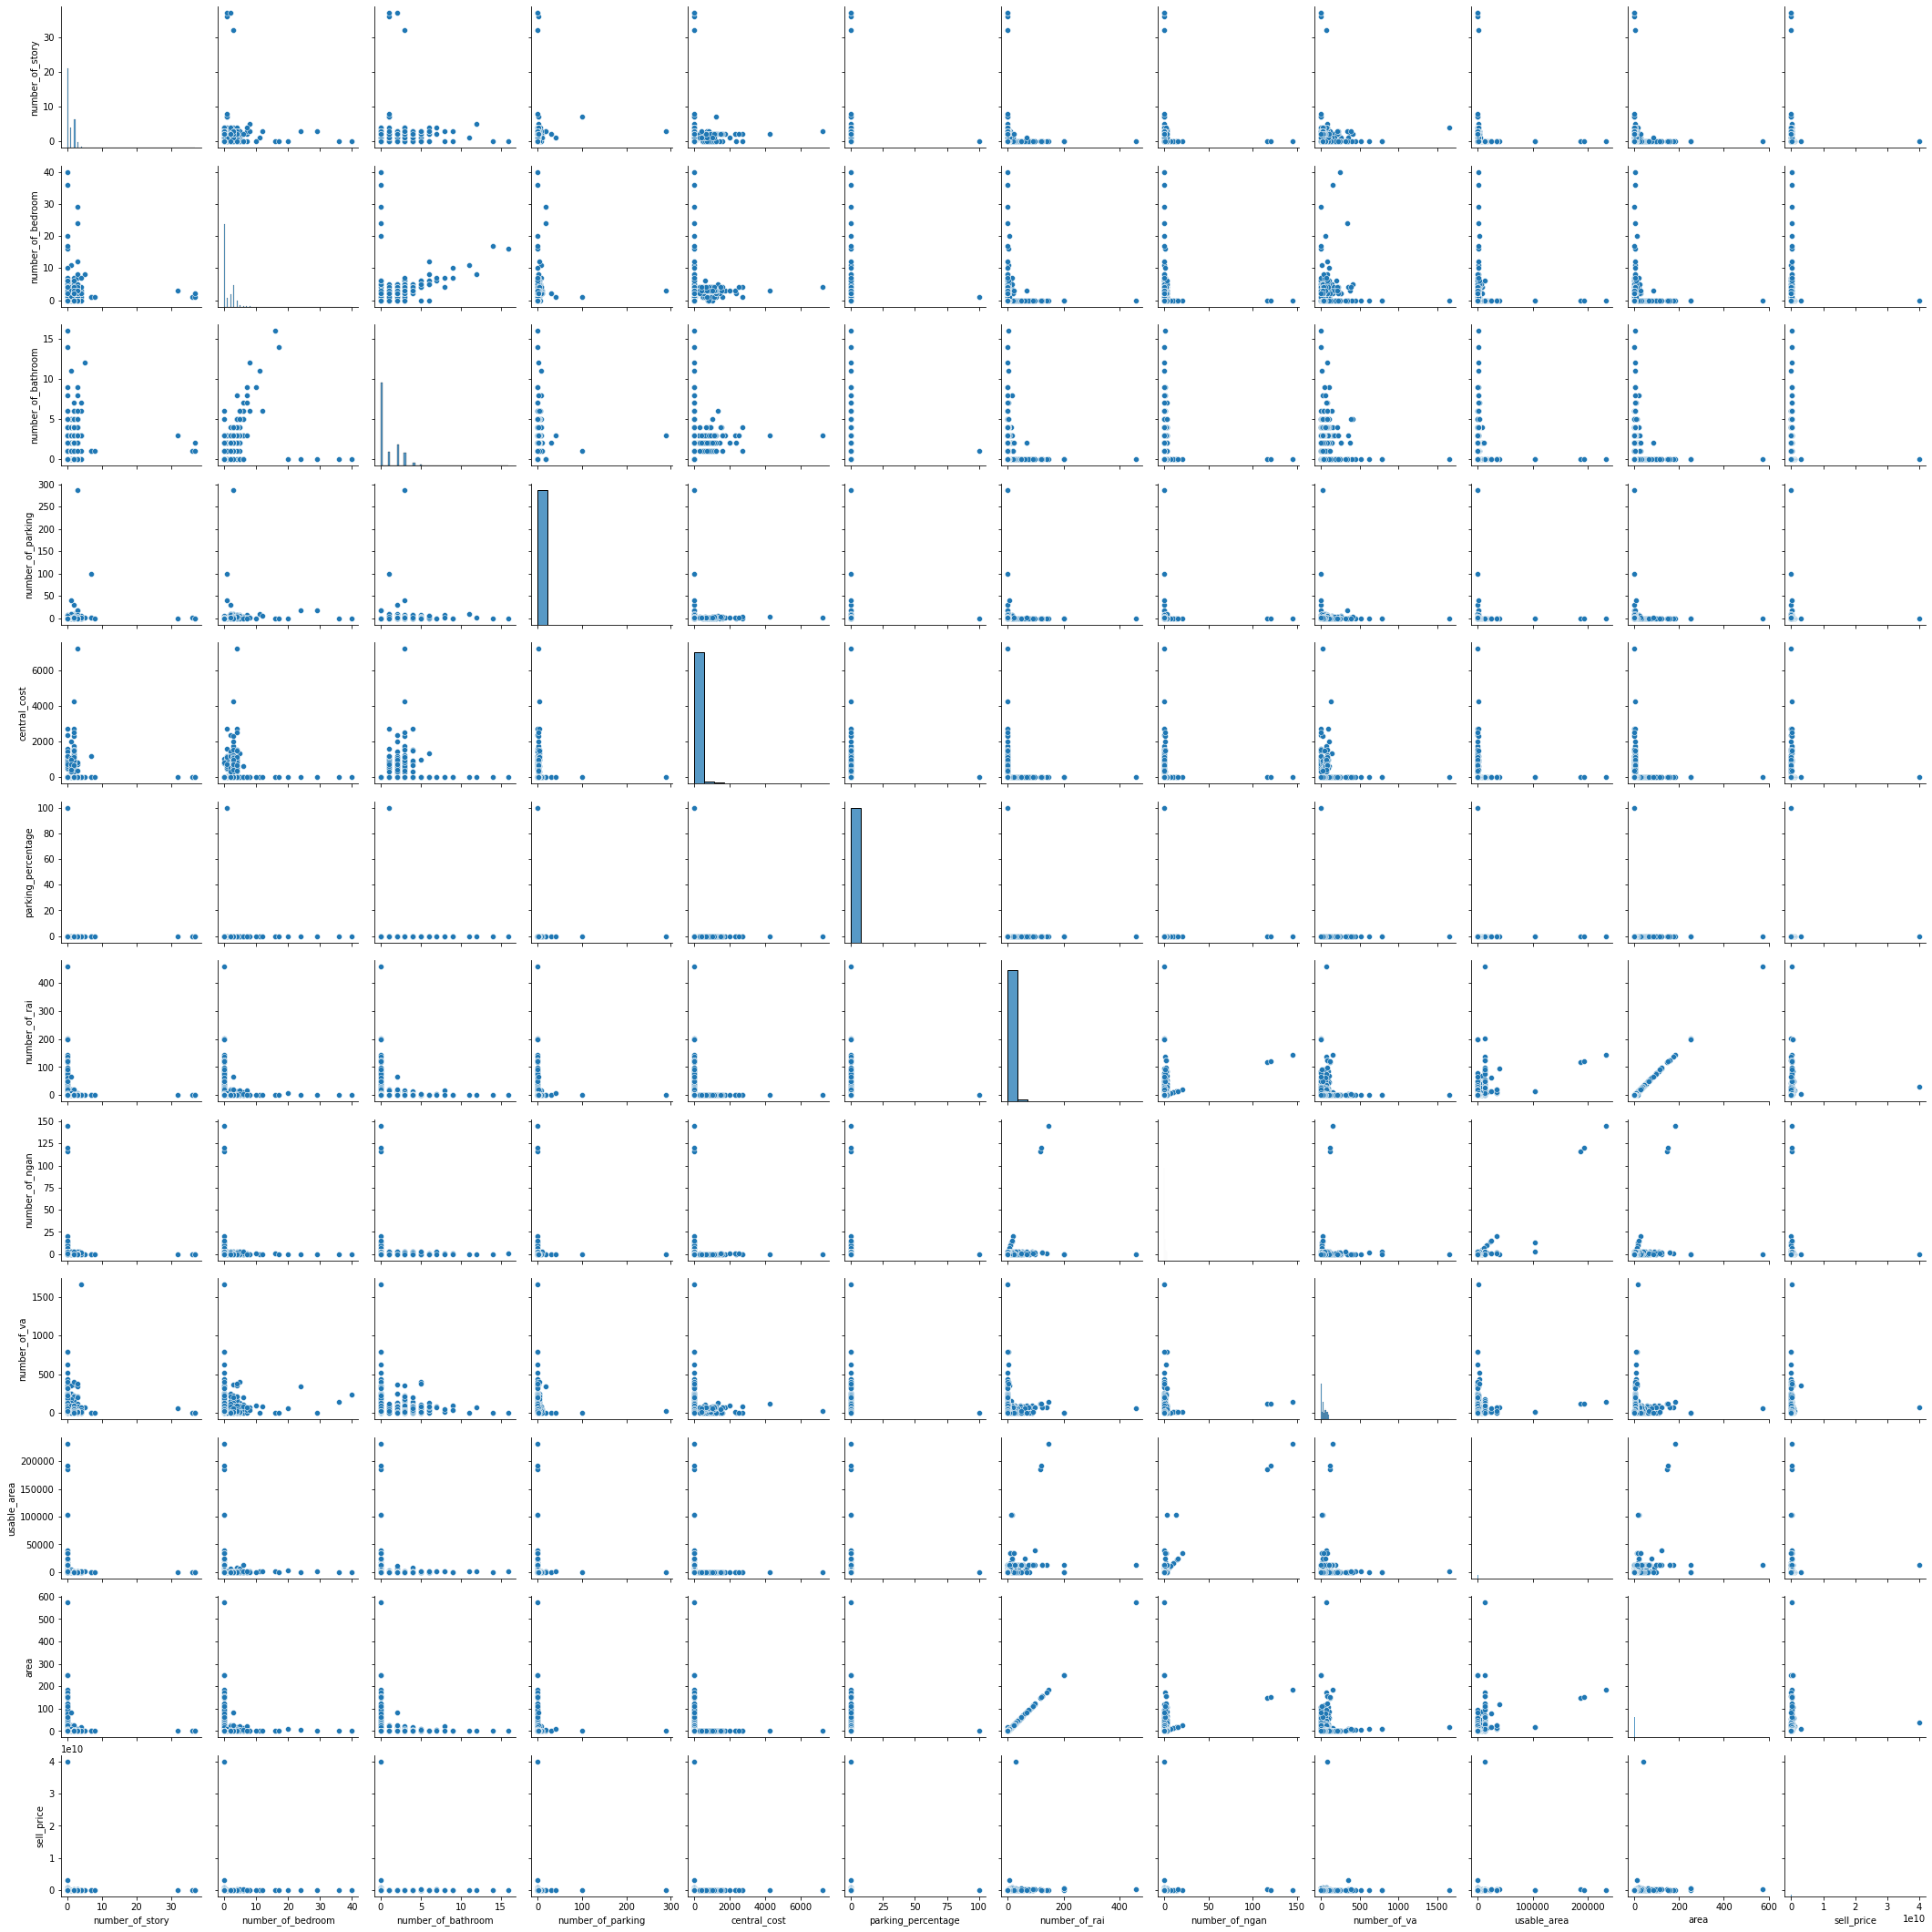

In [27]:
import seaborn as sns

sns.pairplot(MYdataset)

In [28]:
MYdataset.corr()

,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,number_of_rai,number_of_ngan,number_of_va,usable_area,area,sell_price
number_of_story,1.000000,0.244972,0.332613,0.093703,0.061471,-0.008962,-0.099020,-0.054495,0.005733,-0.128850,-0.098865,-0.014514
number_of_bedroom,0.244972,1.000000,0.684909,0.122002,0.111829,-0.000852,-0.108180,-0.059678,0.064218,-0.139926,-0.106292,-0.015274
number_of_bathroom,0.332613,0.684909,1.000000,0.132115,0.156039,0.001869,-0.130209,-0.069849,0.004373,-0.170313,-0.130099,-0.018689
number_of_parking,0.093703,0.122002,0.132115,1.000000,0.023640,-0.002047,-0.020737,-0.012212,0.001628,-0.029048,-0.020692,-0.003147
central_cost,0.061471,0.111829,0.156039,0.023640,1.000000,-0.002522,-0.029364,-0.017465,-0.000101,-0.036101,-0.029372,-0.003954
parking_percentage,-0.008962,-0.000852,0.001869,-0.002047,-0.002522,1.000000,-0.004289,-0.003060,-0.014337,-0.005499,-0.004715,-0.000659
number_of_rai,-0.099020,-0.108180,-0.130209,-0.020737,-0.029364,-0.004289,1.000000,0.280933,-0.019810,0.350613,0.999560,0.062969
number_of_ngan,-0.054495,-0.059678,-0.069849,-0.012212,-0.017465,-0.003060,0.280933,1.000000,0.043961,0.814476,0.282279,0.000799
number_of_va,0.005733,0.064218,0.004373,0.001628,-0.000101,-0.014337,-0.019810,0.043961,1.000000,0.009010,0.009844,0.016257
usable_area,-0.128850,-0.139926,-0.170313,-0.029048,-0.036101,-0.005499,0.350613,0.814476,0.009010,1.000000,0.350932,0.025062


In [29]:
relation = MYdataset.corr()
relation_index = relation.index
relation_index

Index(['number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'number_of_parking', 'central_cost', 'parking_percentage',
       'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area',
       'area', 'sell_price'],
      dtype='object')

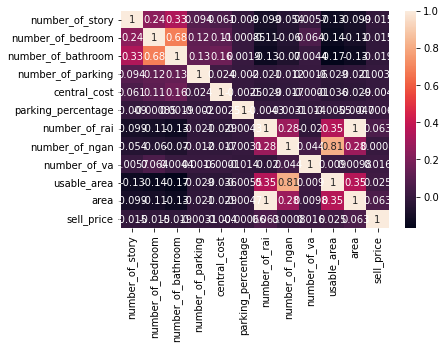

In [30]:
sns.heatmap(MYdataset[relation_index].corr(),annot=True)

## **Selecting features**

#### *Selecting numerical features based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function.*

```
number_of_story	
number_of_bedroom	
number_of_bathroom	
number_of_parking	
central_cost	
parking_percentage	
usable_area	
area
```



#### *Selected the categorical values which I believe have significant effect on the target variable*


```
property_type
furniture
```






#### Target variable


```
sell_price
```

### Save Data set to CSV.

In [31]:
dataset.to_csv('/content/drive/MyDrive/DPDM65/Final/MyDataSet_Finalexam.csv')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------